In [14]:
import numpy as np
import pandas as pd 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [57]:
#auc for METs
datafile = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_Fitbit.csv")
time = datafile['mins'].to_numpy()
mets = datafile['METs'].to_numpy()
datafile['Date_Time'] = pd.to_datetime(datafile['Date_Time'])

time = time[~np.isnan(time)]
mets = mets[~np.isnan(mets)]

tuples = zip(time,mets)
arr = np.asarray(list(tuples))

In [60]:
def activityMetrics(timestring):
    #find start time
    #timestring = '9/18/2021 11:21:00 AM'
    #target_time = datetime.strptime(timestring, '%m/%d/%Y %I:%M:%S %p')
    target_time = datetime.strptime(timestring, '%m/%d/%Y %H:%M')
    theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
    starttime = theday.iloc[0]['Date_Time']
    minutes = int((target_time - starttime).total_seconds() / 60 + theday.iloc[0]['mins'])

    timeframe = 120
    #filter to time interval
    filtered = arr[arr[:,0] <= minutes + timeframe]
    filtered = filtered[filtered[:,0] >= minutes - 60]
    plt.plot(filtered[:,0], filtered[:,1], label = "mets for 2 hrs")
    plt.legend()

    #calculate iauc for that time interval
    activity = filtered[:,1]
    area = auc(filtered[:,0], activity)
    print("three hours auc:", area)
    print("three hours average:", np.average(activity)/10)
    print("three hours activeMins:", len(activity[activity > 20]))
#     threehr.append(len(activity[activity > 20]))

    filtered = filtered[filtered[:,0] >= minutes]
    activity = filtered[:,1]
    area = auc(filtered[:,0], activity)
    print("two hours auc:", area)
    print("two hours average:", np.average(activity)/10)
    print("two hours activeMins:", len(activity[activity > 20]))
#     twohr.append(len(activity[activity > 20]))


9/18/2021 11:21
three hours auc: 2891.0
three hours average: 1.6071823204419888
three hours activeMins: 46
two hours auc: 1866.0
two hours average: 1.5677685950413225
two hours activeMins: 33

9/18/2021 14:23
three hours auc: 4568.5
three hours average: 2.5486187845303867
three hours activeMins: 90
two hours auc: 3067.0
two hours average: 2.584297520661157
two hours activeMins: 57

9/18/2021 20:48
three hours auc: 3445.0
three hours average: 1.9215469613259668
three hours activeMins: 51
two hours auc: 1423.5
two hours average: 1.1859504132231407
two hours activeMins: 10

9/19/2021 8:18
three hours auc: 4488.5
three hours average: 2.514917127071823
three hours activeMins: 70
two hours auc: 3656.5
two hours average: 3.0826446280991737
two hours activeMins: 60

9/19/2021 12:00
three hours auc: 4011.0
three hours average: 2.234254143646409
three hours activeMins: 71
two hours auc: 1787.0
two hours average: 1.4925619834710744
two hours activeMins: 23

9/19/2021 20:10
three hours auc: 4003.

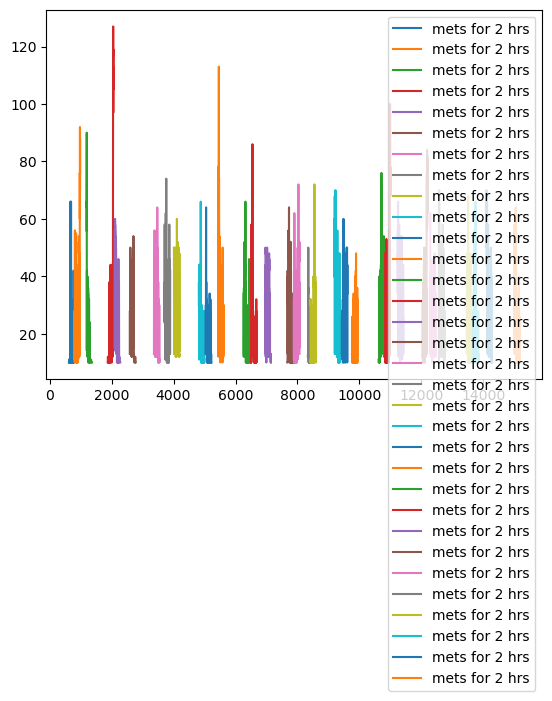

In [61]:
mldata = pd.read_csv("C:\\Users\\namil\\Downloads\\inputdata2.csv").dropna()
mldata['Meal Time'] = mldata['Meal Time'].to_numpy()
# twohr = []
# threehr = []
for i in mldata['Meal Time']:
    print('\n' + i)
    activityMetrics(str(i))
# df = pd.DataFrame({'three hours': threehr, 'two hours': twohr})
# df.to_csv('activity metrics')